<a href="https://colab.research.google.com/github/C3Suryansu/NASA-Sentinel-Data-Extraction/blob/main/Sentinel_S5p_data_SO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using github py script

In [ ]:
#id - harsh9524
#pass - dodceg-vomvo4-vobZym
#63.951, 0, 95.592, 40.078
#68.555,5.801,97.031,36.563
!git clone https://github.com/olivierhagolle/Sentinel-download.git

Cloning into 'Sentinel-download'...
remote: Enumerating objects: 347, done.
remote: Total 347 (delta 0), reused 0 (delta 0), pack-reused 347
Receiving objects: 100% (347/347), 104.51 KiB | 4.98 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [ ]:
!python Sentinel-download/Sentinel_download.py --lat 28.704 --lon 77.102 -a Sentinel-download/apihub.txt -s S2

In [ ]:
#-o 119 (could vary, not sure)
!python Sentinel-download/Sentinel_download.py --latmin 5.801 --latmax 36.563 --lonmin 68.555 --lonmax 97.031 -a Sentinel-download/apihub.txt -d 20200221 -f 20200222 -s S5P

In [ ]:
!python Sentinel-download/Sentinel_download.py --latmin 43 --latmax 46 --lonmin -1 --lonmax 2 -a Sentinel-download/apihub.txt -o 94 -d 20151206 -f 20151207 -n -s S2

In [ ]:
!wget --content-disposition --continue --user=harsh9524 --password=dodceg-vomvo4-vobZym "https://scihub.copernicus.eu/dhus/odata/v1/Products('4187dd00-1a88-43be-a1c1-e201c25560fd')/$value"

--2020-09-24 13:18:50--  https://scihub.copernicus.eu/dhus/odata/v1/Products('4187dd00-1a88-43be-a1c1-e201c25560fd')/
Resolving scihub.copernicus.eu (scihub.copernicus.eu)... 131.176.236.28
Connecting to scihub.copernicus.eu (scihub.copernicus.eu)|131.176.236.28|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="OData service"
Connecting to scihub.copernicus.eu (scihub.copernicus.eu)|131.176.236.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/metalink4+xml]
--2020-09-24 13:18:52--  https://scihub.copernicus.eu/dhus/odata/v1/Products('4187dd00-1a88-43be-a1c1-e201c25560fd')/
Reusing existing connection to scihub.copernicus.eu:443.
HTTP request sent, awaiting response... 200 OK
Length: 2991 (2.9K) [application/metalink4+xml]
Saving to: ‘index.html’

index.html          100%[===================>]   2.92K  --.-KB/s    in 0s      

2020-09-24 13:18:52 (356 MB/s) - ‘index.html’

In [ ]:
!apt-get install aria2

In [ ]:
!aria2c --http-user="your username" --http-passwd="your password" --check-certificate=false --max-concurrent-downloads=2 -M products.meta4

#Using wget


In [ ]:
!mkdir apr2jun
%cd apr2jun

mkdir: cannot create directory ‘apr2jun’: File exists
/content/apr2jun


In [ ]:
!wget --user c3wiz --password Password@123 -i /content/subset_S5P_L2__SO2____HiR_1_20200926_123551.txt

--2020-09-26 12:40:15--  https://tropomi.gesdisc.eosdis.nasa.gov/data/S5P_TROPOMI_Level2/S5P_L2__SO2____HiR.1/2020/116/S5P_OFFL_L2__SO2____20200425T065237_20200425T083408_13122_01_010108_20200427T094211.nc
Resolving tropomi.gesdisc.eosdis.nasa.gov (tropomi.gesdisc.eosdis.nasa.gov)... 198.118.197.54, 2001:4d0:241a:4041::54
Connecting to tropomi.gesdisc.eosdis.nasa.gov (tropomi.gesdisc.eosdis.nasa.gov)|198.118.197.54|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize/?scope=uid&app_type=401&client_id=e2WVk8Pw6weeLUKZYOxvTQ&response_type=code&redirect_uri=http%3A%2F%2Ftropomi.gesdisc.eosdis.nasa.gov%2Fdata-redirect&state=aHR0cHM6Ly90cm9wb21pLmdlc2Rpc2MuZW9zZGlzLm5hc2EuZ292L2RhdGEvUzVQX1RST1BPTUlfTGV2ZWwyL1M1UF9MMl9fU08yX19fX0hpUi4xLzIwMjAvMTE2L1M1UF9PRkZMX0wyX19TTzJfX19fMjAyMDA0MjVUMDY1MjM3XzIwMjAwNDI1VDA4MzQwOF8xMzEyMl8wMV8wMTAxMDhfMjAyMDA0MjdUMDk0MjExLm5j [following]
--2020-09-26 12:40:15--  https://urs.earthdata

In [ ]:
!mkdir febmar_data
%cd febmar_data

/content/febmar_data


In [ ]:
!pip install netcdf4
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

#Plotting the image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import os

In [ ]:
l = os.listdir("/content/febmar_data")

In [ ]:
date = l[0][20:28]

'20200328'

In [ ]:
def data_process(filename):
  df = nc.Dataset(filename, mode = 'r')
  lon = df.groups['PRODUCT'].variables['longitude'][:][0,:,:]
  lat = df.groups['PRODUCT'].variables['latitude'][:][0,:,:]
  data = df.groups['PRODUCT'].variables['sulfurdioxide_total_vertical_column'][:][0,:,:]
  units = df.groups['PRODUCT'].variables['sulfurdioxide_total_vertical_column'].units
  return lon, lat, data, units

In [ ]:
def create_img(filename, date_list):# Get some parameters for the Stereographic Projection
  lon, lat, data, units = data_process(filename)
  lon_0 = lon.mean()
  lat_0 = lat.mean()

  date = filename[20:28]
  yr = date[0:4]
  mon = date[4:6]
  day = date[6:8]
  date = yr + "-" + mon + "-" + day
  if date in date_list:
    date = date + " (1)"
  else:
    date_list.append(date)
  m = Basemap(width=2700000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts = 50,lat_0 = 24,lon_0 = 80)
  xi, yi = m(lon, lat)
  #m = Basemap(llcrnrlat = -90, urcrnrlat = 90,
            #llcrnrlon = -180, urcrnrlon = 180, #width=5000000,height=5000000,
            #resolution='l',projection='stere')
            #lat_ts = 40,lat_0 = 20,lon_0 = 80)
    #csl = []
  #for i in range(3):
    #cs = m.pcolor(xi[i],yi[i],np.squeeze(data[i]), norm = LogNorm(), cmap = 'jet' ) #np.squeeze(data))
    #csl.append(cs)
  #cs = m.pcolor(xi[1],yi[1],np.squeeze(data[1]), norm = LogNorm(), cmap = 'jet' )
  # Add Grid Lines
  m.drawparallels(np.arange(-90., 120., 30.), labels=[1,0,0,0], fontsize=10)
  m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
  m.scatter(xi, yi, c = data, cmap = plt.cm.jet,
            norm = LogNorm(),edgecolors=None, linewidth=0) 

  # Add Coastlines, States, and Country Boundaries
  m.drawcoastlines(linewidth = 0.5)
  #m.drawstates()
  m.drawcountries()

  # Add Colorbar
  cbar = m.colorbar(location='bottom', pad="10%")
  #cbar = m.colorbar()
  cbar.set_label(units)

  # Add Title
  plt.title('SO2 Total Vertical Columns')
  fig = plt.gcf()
  pngfile = "{0}.png".format(date)
  plt.show()
  #fig.savefig("/content/SO2_/"+ pngfile, quality = 95, dpi = 300)
  plt.close()
  return date_list

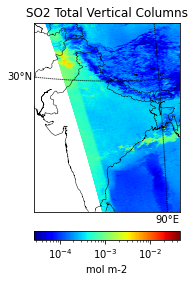

In [ ]:
li = ['test']
l = create_img(l[0], l)
print(l)

In [ ]:
#csl = []
#for i in range(3):
  #cs = m.pcolor(xi[i],yi[i],np.squeeze(data[i]), norm = LogNorm(), cmap = 'jet' ) #np.squeeze(data))
  #csl.append(cs)
#cs = m.pcolor(xi[1],yi[1],np.squeeze(data[1]), norm = LogNorm(), cmap = 'jet' )
# Add Grid Lines
m.drawparallels(np.arange(-90., 120., 30.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
for i in range(3):
  m.scatter(xi[i], yi[i], c = data[i], cmap = plt.cm.jet,
            norm = LogNorm(),edgecolors=None, linewidth=0) 

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines(linewidth = 0.5)
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(location='bottom', pad="10%")
#cbar = m.colorbar()
cbar.set_label(units)

# Add Title
plt.title('SO2 Total Vertical Columns')
fig = plt.gcf()
pngfile = "{0}.png".format('25th December')
fig.savefig("/content/"+ pngfile, quality = 95, dpi = 300)
plt.close()

In [ ]:
import os
l = os.listdir("/content/SO2_final")